In [377]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import itertools

In [378]:
rawD = pd.read_excel('parameters.xlsx')

eV = list(range(25))
index = list(range(25))
iter = 0
for i in range(5):
    for j in range(5):
        eV[iter] = (rawD['t']**i).values*(rawD['V']**j).values
        index[iter] = '(%d, %d)'%(i,j)
        iter += 1

X = np.array(eV[1:]).T
I = np.array(index[1:])

ye_kh = rawD[['kh']].values
ye_ht = rawD[['ht']].values


input_combinations = list(itertools.combinations(range(24),1)) + \
                     list(itertools.combinations(range(24),2)) + \
                     list(itertools.combinations(range(24),3)) + \
                     list(itertools.combinations(range(24),4)) + \
                     list(itertools.combinations(range(24),5)) + \
                     list(itertools.combinations(range(24),6)) + \
                     list(itertools.combinations(range(24),7)) + \
                     list(itertools.combinations(range(24),8)) + \
                     list(itertools.combinations(range(24),9)) + \
                     list(itertools.combinations(range(24),10)) + \
                     list(itertools.combinations(range(24),11)) + \
                     list(itertools.combinations(range(24),12)) + \
                     list(itertools.combinations(range(24),13)) + \
                     list(itertools.combinations(range(24),14)) + \
                     list(itertools.combinations(range(24),15)) + \
                     list(itertools.combinations(range(24),16)) + \
                     list(itertools.combinations(range(24),17)) + \
                     list(itertools.combinations(range(24),18)) + \
                     list(itertools.combinations(range(24),19)) + \
                     list(itertools.combinations(range(24),20)) + \
                     list(itertools.combinations(range(24),21)) + \
                     list(itertools.combinations(range(24),22)) + \
                     list(itertools.combinations(range(24),23)) + \
                     list(itertools.combinations(range(24),24))

r2_kh = []
r2_ht = []
max_iter = len(input_combinations)
iter = 0
for combination in input_combinations:
    X_new = X[:, combination]

    model_kh = LinearRegression()
    model_kh.fit(X_new,ye_kh)
    yp_kh = model_kh.predict(X_new)

    model_ht = LinearRegression()
    model_ht.fit(X_new,ye_ht)
    yp_ht = model_ht.predict(X_new)

    r2_kh.append(model_kh.score(X_new,ye_kh))
    r2_ht.append(model_ht.score(X_new,ye_ht))

    if (iter+1) % 100 == 0:
        print(f'iteration [{iter+1}/{max_iter}]')
    iter += 1

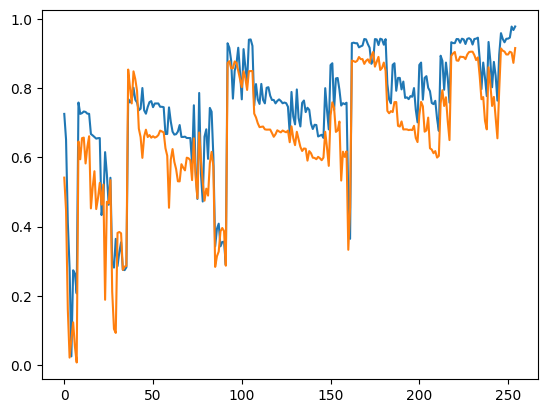

0.9782791001348498
0.915922384875745
254
254


In [ ]:
xplt = list(range(max_iter))

plt.plot(xplt,r2_kh)
plt.plot(xplt,r2_ht)
plt.show()
print(r2_kh[np.argmax(r2_kh)])
print(r2_ht[np.argmax(r2_ht)])
print(np.argmax(r2_kh))
print(np.argmax(r2_ht))

['(0, 1)', '(0, 2)', '(1, 0)', '(1, 1)', '(1, 2)', '(2, 0)', '(2, 1)', '(2, 2)']


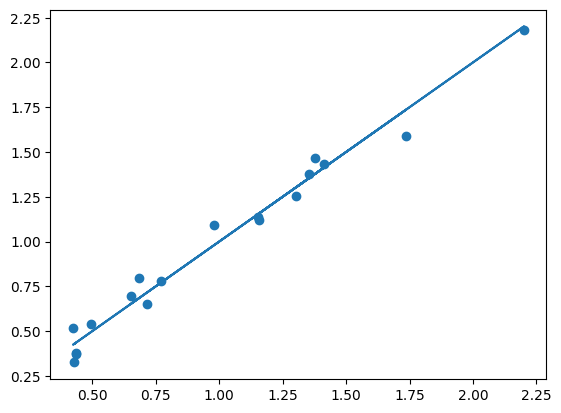

[[-9.32565889e-02  2.09599833e-04  1.77346997e+02 -1.21625012e+01
   1.96267900e-01 -1.62168276e+03  9.80895011e+01 -1.30744631e+00]]
[3.86314934]


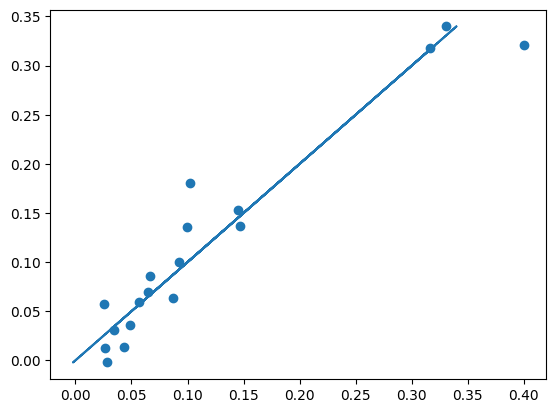

[[-4.21826078e-02  3.00437126e-04  2.24196385e+01 -1.95811501e+00
   3.13161887e-02 -1.69467657e+02  9.93414871e+00 -7.06820597e-02]]
[1.31282631]


In [ ]:
symbol = []
for i in input_combinations[254]:
    symbol.append(I[i])
print(symbol)

X_f = X[:, input_combinations[254]]


model_f_kh = LinearRegression()
model_f_kh.fit(X_f,ye_kh)
yp_kh = model_f_kh.predict(X_f)

model_f_ht = LinearRegression()
model_f_ht.fit(X_f,ye_ht)
yp_ht = model_f_ht.predict(X_f)


plt.plot(ye_kh,ye_kh)
plt.scatter(ye_kh,yp_kh)
plt.show()
print(model_f_kh.coef_)
print(model_f_kh.intercept_)

plt.plot(yp_ht,yp_ht)
plt.scatter(ye_ht,yp_ht)
plt.show()
print(model_f_ht.coef_)
print(model_f_ht.intercept_)
